In [50]:
# Import pytorch packages
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(2)

In [51]:
# Initialize input and output variables
X = torch.Tensor([[0,0], [0,1], [1,0], [1,1]])
Y = torch.Tensor([0, 1, 1, 0]).view(-1,1)

In [56]:
# Define neural network
class XOR(nn.Module):
    def __init__(self, input_dim = 2, output_dim=1):
        super(XOR, self).__init__()
        self.lin1 = nn.Linear(input_dim, 4, bias=False)
        self.lin2 = nn.Linear(4, 4, bias=False)
        self.lin3 = nn.Linear(4, 4, bias=False)
        self.lin4 = nn.Linear(4, output_dim, bias=False)
    
    def forward(self, x):
        x1 = self.lin1(x)
        x1 = F.tanh(x1)
        x2 = self.lin2(x1)
        x2 = F.tanh(x2)
        x3 = self.lin3(x2)
        x3 = F.tanh(x3)
        x4 = self.lin4(x3)
        # x4 = F.tanh(x) # As per assignment, removed tanh(activation fn from last layer)        
        return x4

In [57]:
# print model summary
model = XOR()
print(model)
from torchsummary import summary

summary(model, (2,2))

XOR(
  (lin1): Linear(in_features=2, out_features=4, bias=False)
  (lin2): Linear(in_features=4, out_features=4, bias=False)
  (lin3): Linear(in_features=4, out_features=4, bias=False)
  (lin4): Linear(in_features=4, out_features=1, bias=False)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 2, 4]               8
            Linear-2                 [-1, 2, 4]              16
            Linear-3                 [-1, 2, 4]              16
            Linear-4                 [-1, 2, 1]               4
Total params: 44
Trainable params: 44
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


## torchviz
A small package to create visualizations of PyTorch execution graphs and traces. <br>
Ref: <br>
https://pypi.org/project/torchviz/ <br>
https://github.com/szagoruyko/pytorchviz <br>

In [58]:
!pip install torchviz


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


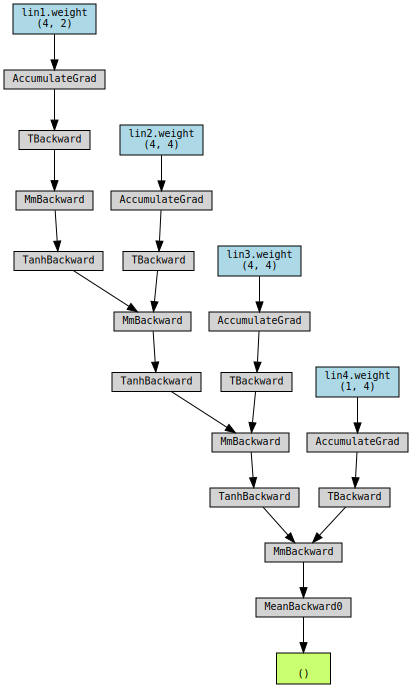

In [59]:

y_hat = model(X)
make_dot(y_hat.mean(), params=dict(model.named_parameters()))



In [60]:
def weights_init(model):
    for m in model.modules():
        if isinstance(m, nn.Linear):
            # initialize the weight tensor, here we use a normal distribution
            m.weight.data.normal_(0, 1)

weights_init(model)

In [61]:
loss_func = nn.L1Loss()

In [62]:
optimizer = optim.SGD(model.parameters(), lr=0.02, momentum=0.9)


In [63]:
epochs = 2001
steps = X.size(0)
for i in range(epochs):
    for j in range(steps):
        data_point = np.random.randint(X.size(0))
        x_var = Variable(X[data_point], requires_grad=False)
        y_var = Variable(Y[data_point], requires_grad=False)
        
        optimizer.zero_grad()
        y_hat = model(x_var)
        loss = loss_func.forward(y_hat, y_var)
        loss.backward()
        optimizer.step()
        
    if i % 50 == 0:
        print( "Epoch: {0}, Loss: {1}, ".format(i, loss.data.numpy()))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch: 0, Loss: 1.1030948162078857, 
Epoch: 50, Loss: 0.41433537006378174, 
Epoch: 100, Loss: 0.0053980350494384766, 
Epoch: 150, Loss: 0.0, 
Epoch: 200, Loss: 0.32950276136398315, 
Epoch: 250, Loss: 0.0, 
Epoch: 300, Loss: 0.0, 
Epoch: 350, Loss: 0.0, 
Epoch: 400, Loss: 0.12558186054229736, 
Epoch: 450, Loss: 0.0816851258277893, 
Epoch: 500, Loss: 0.07624459266662598, 
Epoch: 550, Loss: 0.031116724014282227, 
Epoch: 600, Loss: 0.0, 
Epoch: 650, Loss: 0.08988654613494873, 
Epoch: 700, Loss: 0.05684204399585724, 
Epoch: 750, Loss: 0.0, 
Epoch: 800, Loss: 0.10204732418060303, 
Epoch: 850, Loss: 0.0580272376537323, 
Epoch: 900, Loss: 0.0, 
Epoch: 950, Loss: 0.0, 
Epoch: 1000, Loss: 0.038263678550720215, 
Epoch: 1050, Loss: 0.0204392671585083, 
Epoch: 1100, Loss: 0.0, 
Epoch: 1150, Loss: 0.04348587989807129, 
Epoch: 1200, Loss: 0.09081804752349854, 
Epoch: 1250, Loss: 0.09674465656280518, 
Epoch: 1300, Loss: 0.0, 
Epoch: 1350, Loss: 0.0, 
Epoch: 1400, Loss: 0.32269442081451416, 
Epoch: 145